In [31]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [32]:
#@title MIT License
#
# Copyright (c) 2023 Ilja Heitlager
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of cifar10

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [33]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


## Import the CIFAR10 dataset

In [34]:
cifar = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()
# train_images = tf.image.rgb_to_grayscale(org_train_images)
# test_images = tf.image.rgb_to_grayscale(org_test_images)

In [35]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

len(class_names)

10

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 50,000 images in the training set, with each image represented as 32 x 32 pixels:

In [36]:
train_images.shape

(50000, 32, 32, 3)

Likewise, there are 50,000 labels in the training set:

In [37]:
len(train_labels)

50000

Each label is an integer between 0 and 100:

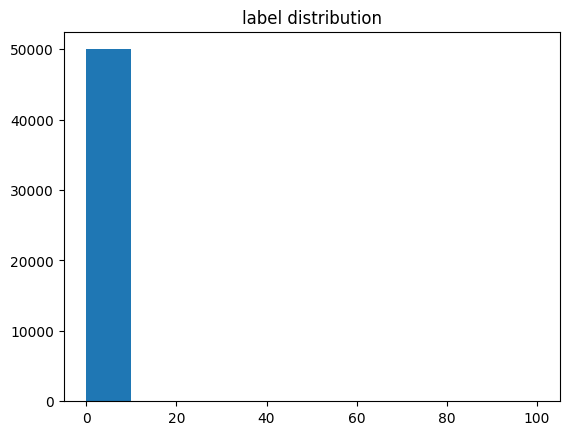

In [38]:
# train_labels
plt.hist(np.array(train_labels), bins = [0,10,20,30,40,50,60,70,80,90,100])
plt.title("label distribution")
plt.show()

In [39]:
test_images.shape

(10000, 32, 32, 3)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

And the test set contains 10,000 images labels:

In [40]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

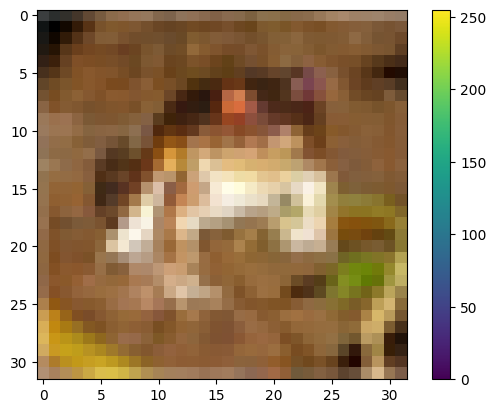

In [41]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

In [42]:
train_labels[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

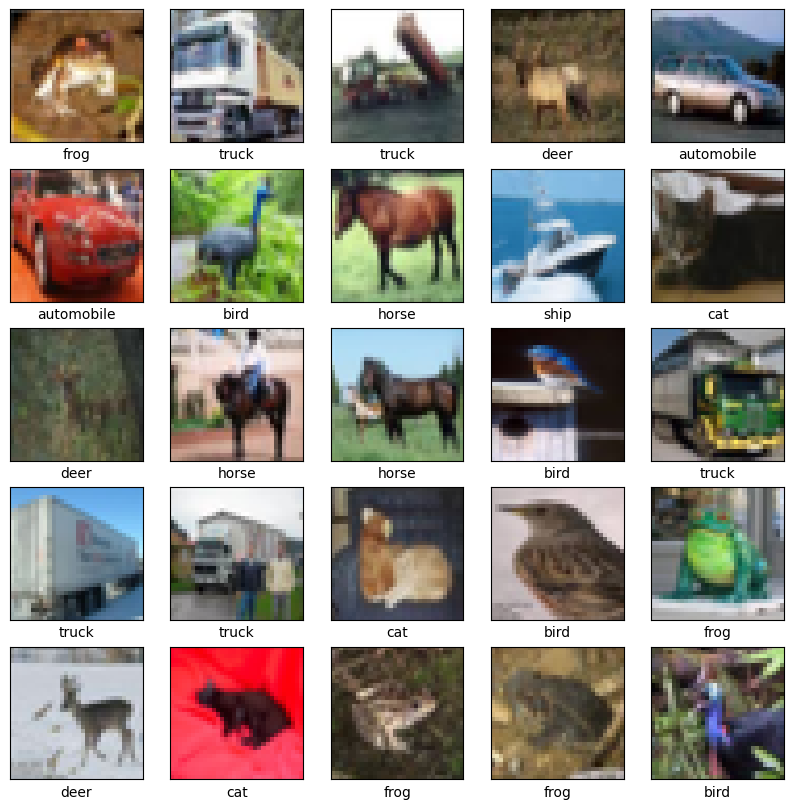

In [43]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. See the [Apple developer website](https://developer.apple.com/metal/tensorflow-plugin/)

In [44]:
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=(32, 32, 3),
    classes=10,)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 71s 84ms/step - loss: 1.9933 - accuracy: 0.3582
Epoch 2/5
782/782 [==============================] - 62s 80ms/step - loss: 1.8345 - accuracy: 0.4177
Epoch 3/5
782/782 [==============================] - 62s 79ms/step - loss: 1.9370 - accuracy: 0.3866
Epoch 4/5
782/782 [==============================] - 62s 79ms/step - loss: 2.0945 - accuracy: 0.3001
Epoch 5/5
782/782 [==============================] - 62s 80ms/step - loss: 1.8654 - accuracy: 0.3723


### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [45]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 8s - loss: 1.6990 - accuracy: 0.3719 - 8s/epoch - 26ms/step

Test accuracy: 0.3718999922275543


### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [46]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [47]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 7s 19ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [48]:
predictions[0]

array([0.09165149, 0.09059085, 0.10393918, 0.10823545, 0.10621932,
       0.09891156, 0.12608837, 0.09189788, 0.09185809, 0.09060784],
      dtype=float32)

In [49]:
np.argmax(predictions[0])

6

In [50]:
test_labels[0]

array([3], dtype=uint8)

Define functions to graph the full set of 10 class predictions.

In [53]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  # print(predicted_label, true_label)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

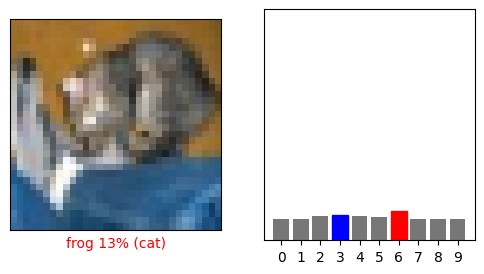

In [54]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

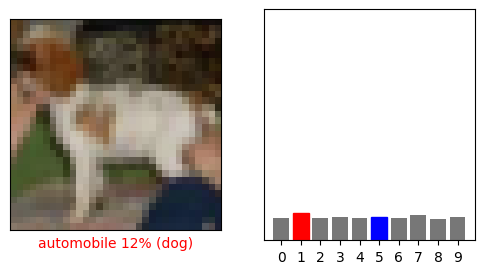

In [55]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

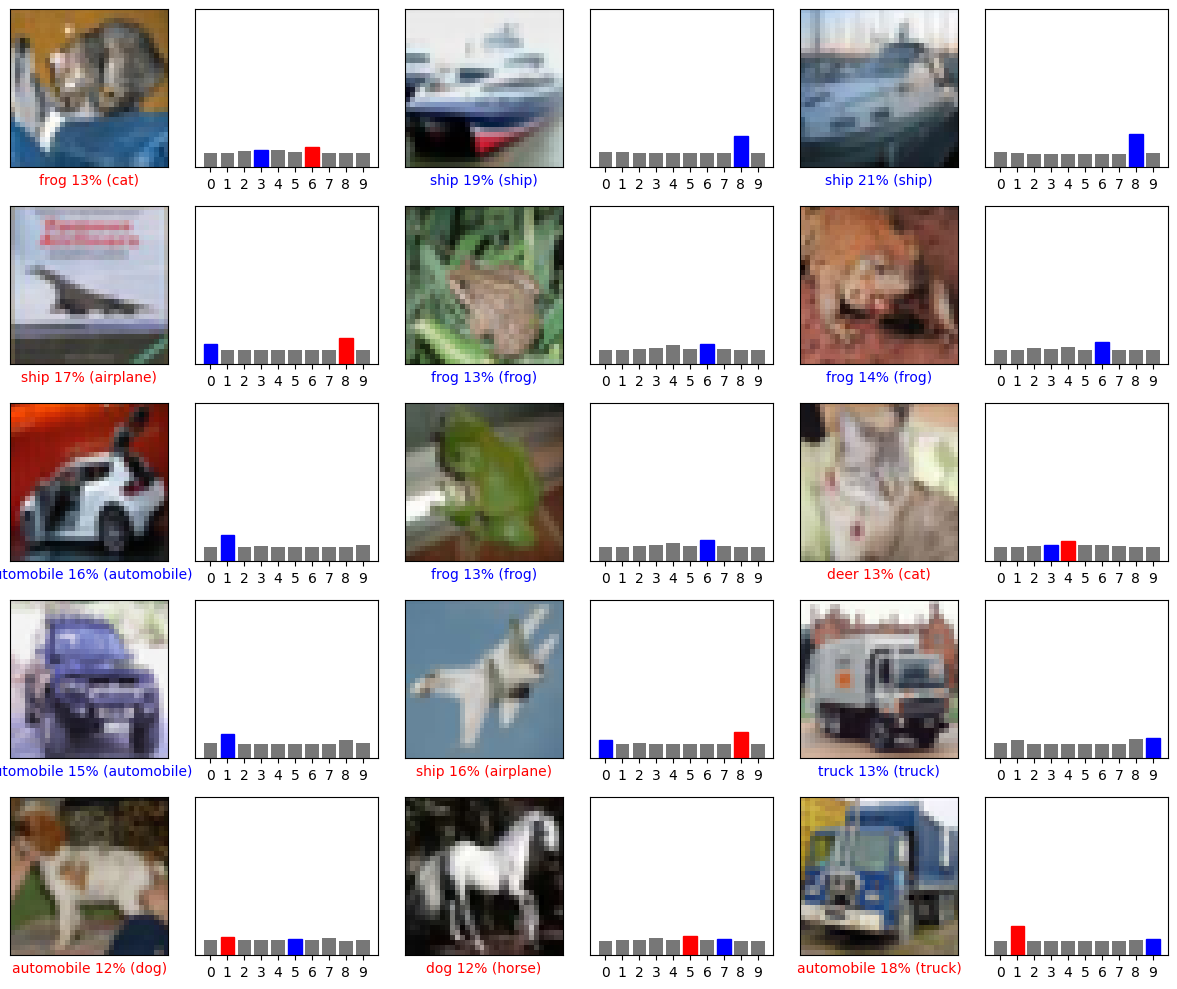

In [56]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [57]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(32, 32, 3)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [58]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 32, 32, 3)


Now predict the correct label for this image:

In [59]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 2s 2s/step
[[0.09572636 0.09580645 0.08745871 0.08744375 0.0874624  0.08744288
  0.08744341 0.08744339 0.1949092  0.08886344]]


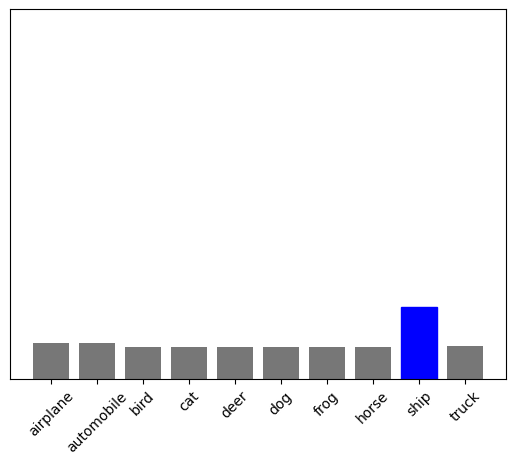

In [60]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [61]:
np.argmax(predictions_single[0])

8

And the model predicts a label as expected.

To learn more about building models with Keras, see the [Keras guides](https://www.tensorflow.org/guide/keras).